# Quality Prediction in Iron Ore Mining

Our Aim is to predict the percentage of silica in the end of the mining process of the iron ore

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
df = pd.read_csv("MiningProcess_Flotation_Plant.csv",decimal=",",parse_dates=["date"],infer_datetime_format=True).drop_duplicates()

/tmp/ipykernel_114079/37069136.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("MiningProcess_Flotation_Plant.csv",decimal=",",parse_dates=["date"],infer_datetime_format=True).drop_duplicates()


### A basic analysis of dataset

In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


* In the dataset we have to predict the  **% Silica Concentrate**
* Silica Concentrate is the impurity in the iron ore which needs to be removed
* The current process of detecting silica takes many hours.
* With the help of some analysis and modelling of data we can give a good approximation of silica concentrate which will reduce a lot of time and effort required for processing iron ore

In [4]:
df.shape

(736282, 24)

In [5]:
df = df.dropna()
df.shape

(736282, 24)

Great! So we can see that there are no null values in the dataset.

In [6]:
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,2017-06-16 02:30:44.009767936,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
min,2017-03-10 01:00:00,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,2017-05-04 21:00:00,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,2017-06-16 12:00:00,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,2017-07-29 09:00:00,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,2017-09-09 23:00:00,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000
std,NaN,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616


A basic decsription of the dataset

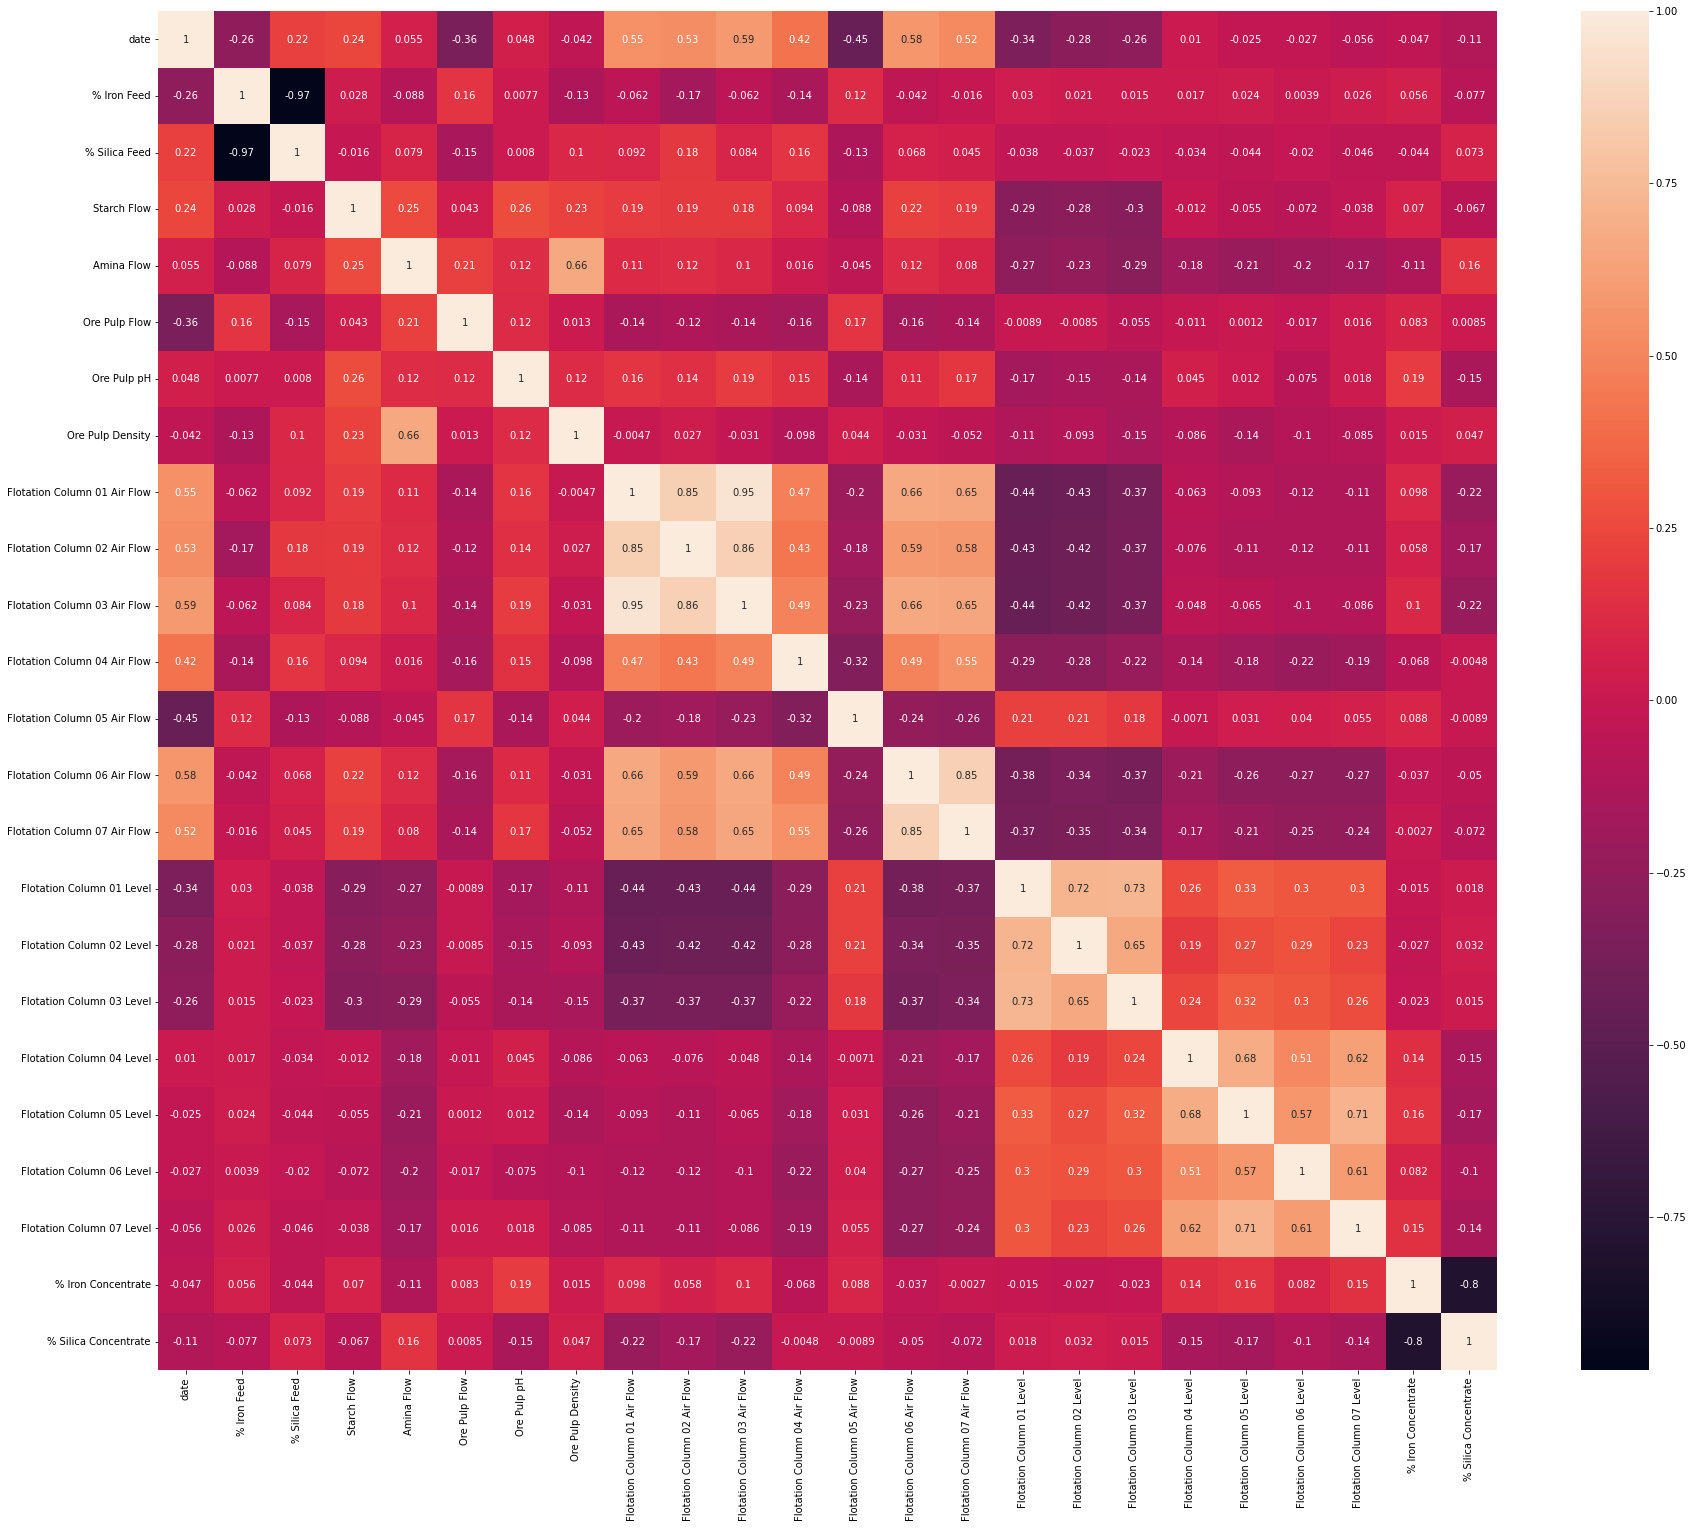

In [7]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

Above plot shows the correaltions between the features.
From the plot we can find out the features which affects the % Silica Concentrate the most

### Preparing the Dataset

Now we will have to drop those features which are not useful for us

In [8]:
df = df.drop(['date', '% Iron Concentrate', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
              'Flotation Column 03 Air Flow'], axis=1)

In [9]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,1.74,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,1.74,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2,55.2,16.98,3043.46,568.054,399.668,1.74,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
3,55.2,16.98,3047.36,568.665,397.939,1.74,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
4,55.2,16.98,3033.69,558.167,400.254,1.74,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31


In [10]:
Y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1)

### Scaling the features

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [12]:
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

### Splitting the Data

Now we will split data into train and test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

### Training a Model

#### Using Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
_ = reg.fit(X_train, Y_train)

In [18]:
predictions = reg.predict(X_test)
predictions

array([2.9661312 , 2.08750249, 2.48277175, ..., 2.36085944, 2.24827599,
       1.93280309])

Finding Mean Squared Error

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
error = mean_squared_error(Y_test, predictions)
error

1.153449863334778

#### Using Stochastic Gradient Descent

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
reg_sgd = SGDRegressor(max_iter=1000, tol=1e-3)

In [23]:
_ = reg_sgd.fit(X_train, Y_train)

In [24]:
predicitons_sgd = reg_sgd.predict(X_test)

Finding Mean Squared Error

In [25]:
error_sgd = mean_squared_error(Y_test, predicitons_sgd)
error_sgd

1.157238270826769